MODEL FOR PREDICTING KICKSTARTER PROJECTS' SUCCESS/FAILURE

import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import data and create a dataframe

In [2]:
df=pd.read_csv('train9.csv')

In [3]:
df.head()

,Name,Goal,Status,Currency,DeadlineDate,NamefromUrl,N_Category,N_Location,N_min_Price,N_FAQ,...,N_ScrapeDate,D_Target,D_backers,D_TotalAmountPledged,D_FAQ,D_updates,D_Comments,D_StartDate,D_EndDate,D_ended
0,Yeehaw Wand - Build anything out of thin air,25000,live,USD,01-14-2018,yeehaw-wand-experience-the-future-of-design,Technology,Shenzhen China,99,0,...,11-15-2017,1,375,57690,0,0,0,11-15-2017,01-14-2018,ended
1,PIXO Pixel - An ESP32 Based IoT RGB Display fo...,6000,live,CAD,02-19-2018,pixo-pixel-an-esp32-based-iot-rgb-display-for-...,DIY Electronics,Ottawa Canada,10,0,...,01-30-2018,1,158,20488,0,0,0,01-30-2018,02-19-2018,ended
2,"\""Positive Space\"" Inspirational Space Prints",700,live,USD,02-28-2018,make-100-positive-space-inspirational-space-pr...,Space Exploration,Jersey City NJ,52,0,...,02-15-2018,1,34,1698,0,0,0,01-29-2018,02-28-2018,ended
3,Mars Open: Tabletop Golf,5000,live,USD,12-05-2017,mars-open-tabletop-golf,Tabletop Games,Bryan TX,24,0,...,11-22-2017,1,740,26537,0,0,0,11-07-2017,12-04-2018,ended
4,The Wall 2061 Citygame,3500,live,EUR,02-23-2018,the-wall-2061-citygame,Live Games,Berlin Germany,5,2,...,01-24-2018,1,106,5518,0,0,0,01-24-2018,02-23-2018,ended


GET DUMMY VALUES FOR ALL CATEGORIAL VARIABLES: CURRENCY , CATEGORY

In [4]:
currency=pd.get_dummies(df['Currency'],drop_first=True)

In [5]:
df=pd.concat([df,currency],axis=1)

In [6]:
categry=pd.get_dummies(df['N_Category'],drop_first=True)

In [7]:
df=pd.concat([df,categry],axis=1)

In [8]:
status=pd.get_dummies(df['Status'],drop_first=True)

In [9]:
df=pd.concat([df,status],axis=1)

In [10]:
df.columns

Index(['Name', 'Goal', 'Status', 'Currency', 'DeadlineDate', 'NamefromUrl',
       'N_Category', 'N_Location', 'N_min_Price', 'N_FAQ', 'N_Updates',
       'N_Comments', 'N_ScrapeDate', 'D_Target', 'D_backers',
       'D_TotalAmountPledged', 'D_FAQ', 'D_updates', 'D_Comments',
       'D_StartDate', 'D_EndDate', 'D_ended', 'CAD', 'CHF', 'DKK', 'EUR',
       'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD',
       '3D Printing', 'Apps', 'Art Books', 'Camera Equipment',
       'DIY Electronics', 'Fabrication Tools', 'Flight', 'Gadgets', 'Games',
       'Gaming Hardware', 'Hardware', 'Live Games', 'Makerspaces',
       'Mobile Games', 'Playing Cards', 'Product Design', 'Puzzles', 'Robots',
       'Software', 'Sound', 'Space Exploration', 'Tabletop Games',
       'Technology', 'Video Games', 'Wearables', 'Web', 'successful'],
      dtype='object')

In [11]:
df['D_StartDate'][0]

'11-15-2017'

CONVERT DATE COLUMNS INTO TIMESTAMP

In [12]:
df['D_StartDate'] = pd.to_datetime(df['D_StartDate'])

In [13]:
df['D_EndDate'] = pd.to_datetime(df['D_EndDate'])

CONVERT DATE COLUMNS AS DAY OF THE MONTH , MONTH AND YEAR COLUMNS

In [14]:
df['StartDateDay'] = df['D_StartDate'].map(lambda x: x.day)

In [15]:
df['StartDateMonth'] = df['D_StartDate'].map(lambda x: x.month)

In [16]:
df['StartDateYear'] = df['D_StartDate'].map(lambda x: x.year)

In [17]:
df['EndDateDay'] = df['D_EndDate'].map(lambda x: x.day)

In [18]:
df['EndDateMonth'] = df['D_EndDate'].map(lambda x: x.month)

In [19]:
df['EndDateYear'] = df['D_EndDate'].map(lambda x: x.year)

DROP ALL UNNECESSARY COLUMNS

In [20]:
data=df.drop(['Status', 'Currency', 'DeadlineDate', 'NamefromUrl', 'N_Location','N_ScrapeDate','D_StartDate', 'D_EndDate','D_ended',],axis=1)

In [21]:
data.head()

,Name,Goal,N_Category,N_min_Price,N_FAQ,N_Updates,N_Comments,D_Target,D_backers,D_TotalAmountPledged,...,Video Games,Wearables,Web,successful,StartDateDay,StartDateMonth,StartDateYear,EndDateDay,EndDateMonth,EndDateYear
0,Yeehaw Wand - Build anything out of thin air,25000,Technology,99,0,0,0,1,375,57690,...,0,0,0,0,15,11,2017,14,1,2018
1,PIXO Pixel - An ESP32 Based IoT RGB Display fo...,6000,DIY Electronics,10,0,0,1,1,158,20488,...,0,0,0,0,30,1,2018,19,2,2018
2,"\""Positive Space\"" Inspirational Space Prints",700,Space Exploration,52,0,2,1,1,34,1698,...,0,0,0,0,29,1,2018,28,2,2018
3,Mars Open: Tabletop Golf,5000,Tabletop Games,24,0,5,72,1,740,26537,...,0,0,0,0,7,11,2017,4,12,2018
4,The Wall 2061 Citygame,3500,Live Games,5,2,0,0,1,106,5518,...,0,0,0,0,24,1,2018,23,2,2018


SPLIT THE DATA INTO TWO SETS FOR TRAINING AND TESTING 70/30

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
dftrain,dftest = train_test_split(data, test_size=0.30)

In [24]:
len(data)

2653

In [25]:
len(dftrain)

1857

In [26]:
len(dftest)

796

LOGISTIC REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lm=LogisticRegression()

In [29]:
X_train=dftrain.drop(['Name','N_Category','D_Target'],axis=1)
y_train=dftrain['D_Target']

In [30]:
model=lm.fit(X_train,y_train)

In [31]:
X_test=dftest.drop(['Name','N_Category','D_Target'],axis=1)

In [32]:
predictions=lm.predict(X_test)

In [33]:
predictions

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,

EVALUATE THE MODEL

In [34]:
from sklearn import metrics

In [35]:
y_test=dftest['D_Target']

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.06030150753768844
MSE: 0.06030150753768844
RMSE: 0.2455636527210174


In [37]:
from sklearn.metrics import classification_report

In [38]:
print('Classification Matrix:\n',classification_report(y_test,predictions))

Classification Matrix:
              precision    recall  f1-score   support

          0       0.92      0.99      0.95       498
          1       0.97      0.86      0.91       298

avg / total       0.94      0.94      0.94       796



In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions))


Confusion Matrix:
 [[491   7]
 [ 41 257]]


In [41]:
print ('Score:'), model.score(X_test, y_test)

Score:


(None, 0.9396984924623115)

DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree = DecisionTreeClassifier()

In [44]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
DTpredictions = dtree.predict(X_test)

In [46]:
print('Classification Matrix:\n',classification_report(y_test,DTpredictions))

Classification Matrix:
              precision    recall  f1-score   support

          0       0.99      0.99      0.99       498
          1       0.98      0.98      0.98       298

avg / total       0.98      0.98      0.98       796



In [47]:
print('Confusion Matrix:\n',confusion_matrix(y_test,DTpredictions))

Confusion Matrix:
 [[492   6]
 [  7 291]]


RANDOM FOREST MODEL

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=650)

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=650, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
RFpredictions = rfc.predict(X_test)

In [52]:
print('Classification Matrix:\n',classification_report(y_test,RFpredictions))

Classification Matrix:
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       498
          1       1.00      0.97      0.98       298

avg / total       0.99      0.99      0.99       796



In [53]:
print('Confusion Matrix:\n',confusion_matrix(y_test,RFpredictions))

Confusion Matrix:
 [[497   1]
 [ 10 288]]


In [55]:
output = pd.DataFrame({'ProjectName' : dftest['Name'],'Category' : dftest['N_Category'], 'Original Results': y_test , 'Prediction' : RFpredictions})

output.to_csv('submission.csv', index=False)

K NEAREST NEIGHBORS

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [59]:
KNNpredictions = knn.predict(X_test)

In [60]:
print('WITH K=1')
print('\n')
print('Classification Matrix:\n',classification_report(y_test,KNNpredictions))
print('\n')

print('Confusion Matrix:\n',confusion_matrix(y_test,KNNpredictions))

WITH K=1


Classification Matrix:
              precision    recall  f1-score   support

          0       0.99      0.97      0.98       498
          1       0.95      0.98      0.96       298

avg / total       0.97      0.97      0.97       796



Confusion Matrix:
 [[483  15]
 [  7 291]]


CHOOSING A K VALUE

In [61]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

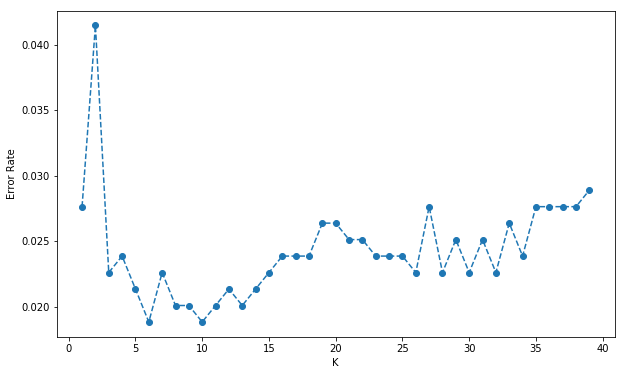

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40) , error_rate , linestyle='--' , marker='o' )
plt.xlabel('K')
plt.ylabel('Error Rate')

In [63]:
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
KNN10predictions = knn.predict(X_test)
print('WITH K=10')
print('\n')
print('Classification Matrix:\n',classification_report(y_test,KNN10predictions))
print('\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,KNN10predictions))

WITH K=10


Classification Matrix:
              precision    recall  f1-score   support

          0       1.00      0.97      0.98       498
          1       0.95      1.00      0.98       298

avg / total       0.98      0.98      0.98       796



Confusion Matrix:
 [[483  15]
 [  0 298]]


SUPPORT VECTOR MACHINES (SVM)

In [64]:
from sklearn.svm import SVC

In [65]:
svc_model = SVC()

In [66]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
SVMpredictions = svc_model.predict(X_test)

In [68]:
print('\n')
print('Classification Matrix:\n',classification_report(y_test,SVMpredictions))
print('\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,SVMpredictions))



Classification Matrix:
              precision    recall  f1-score   support

          0       0.63      1.00      0.77       498
          1       0.00      0.00      0.00       298

avg / total       0.39      0.63      0.48       796



Confusion Matrix:
 [[498   0]
 [298   0]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GRID SEARCH

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel':['rbf']} 

In [71]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   28.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [72]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [73]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
grid_predictions = grid.predict(X_test)

In [75]:
print('\n')
print('Classification Matrix:\n',classification_report(y_test,grid_predictions))
print('\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,grid_predictions))



Classification Matrix:
              precision    recall  f1-score   support

          0       0.65      1.00      0.78       498
          1       0.96      0.09      0.16       298

avg / total       0.76      0.66      0.55       796



Confusion Matrix:
 [[497   1]
 [272  26]]
